# Citi Bike Project

## Import Packages

In [1]:
import requests

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from geodatasets import get_path

plt.style.use('ggplot')

In [2]:
pd.__version__

'2.2.2'

## Loading trip data

In [3]:
df = pd.read_csv('../data/202405-citibike-tripdata/202405-citibike-tripdata_1.csv')

/var/folders/st/m0b_93g97bxcmqnsx5v2qdm00000gn/T/ipykernel_13329/4292729557.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/202405-citibike-tripdata/202405-citibike-tripdata_1.csv')


In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  FE6A074FC945A086  electric_bike  2024-05-01 08:05:53  2024-05-01 08:15:14   
1  6844CF42F72827D7   classic_bike  2024-05-10 15:00:06  2024-05-10 15:08:58   
2  D7C9E007F791A7A2   classic_bike  2024-05-06 12:28:39  2024-05-06 12:35:21   
3  3419650E2F5999F1   classic_bike  2024-05-16 16:09:14  2024-05-16 16:14:20   
4  5469FDC75E0F1FCA  electric_bike  2024-05-29 15:43:37  2024-05-29 15:49:27   

  start_station_name start_station_id      end_station_name end_station_id  \
0    1 Ave & E 30 St          6079.03       E 74 St & 1 Ave        6953.08   
1     31 Ave & 57 St          6621.06  31 Ave & Steinway St        6782.01   
2    E 89 St & 3 Ave          7265.10       E 80 St & 2 Ave        7121.02   
3    E 89 St & 3 Ave          7265.10       E 80 St & 2 Ave        7121.02   
4    1 Ave & E 30 St          6079.03       E 45 St & 3 Ave        6464.08   

   start_lat  start_lng    end_lat    end_lng member_casual  
0  40.741509 -73.975355  40.768974 -73.954823        member  
1  40.757357 -73.904726  40.761149 -73.917007        member  
2  40.780628 -73.952167  40.773914 -73.954395        member  
3  40.780628 -73.952167  40.773914 -73.954395        member  
4  40.741444 -73.975361  40.752554 -73.972826        member

In [6]:
# get the stations information

req = requests.get("https://gbfs.lyft.com/gbfs/2.3/bkn/en/station_information.json")

<Axes: xlabel='lon', ylabel='lat'>

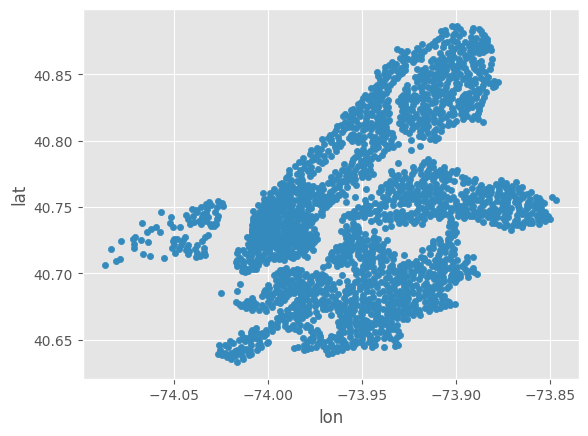

In [7]:
pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat')

In [8]:
nyc = gpd.read_file(get_path('nybb'))
nybb = nyc.to_crs(32619)

In [9]:
pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].head()

lon        lat
0 -74.003140  40.723230
1 -74.013181  40.703662
2 -73.989873  40.738661
3 -73.908351  40.819890
4 -73.943860  40.823498

<Axes: >

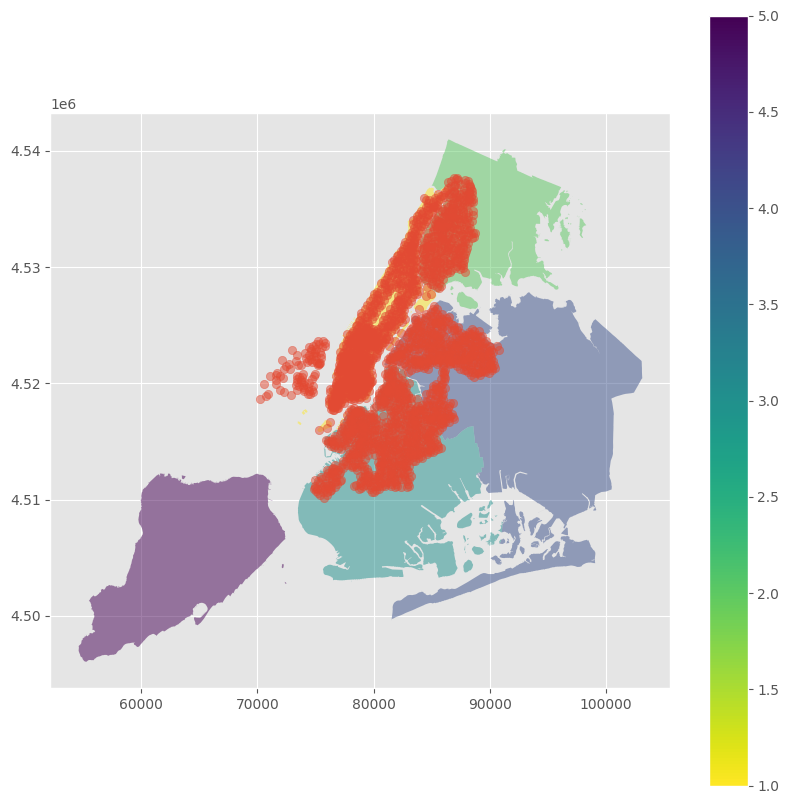

In [10]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
nybb.plot(column='BoroCode', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
#pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat', ax=ax)

dd = pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']]

gdf = gpd.GeoDataFrame(
    dd, geometry=gpd.points_from_xy(dd.lon, dd.lat), crs="EPSG:4326").to_crs(32619)
gdf.plot(ax=ax, alpha= 0.5)
# plt.xlim(74000, 90000)
# plt.ylim(4.51e6, 4.55e6)

In [11]:
nybb

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((72387.313 4502901.349, 72390.3...  
1  MULTIPOLYGON (((90672.492 4505050.592, 90663.5...  
2  MULTIPOLYGON (((88021.476 4503764.521, 87967.7...  
3  MULTIPOLYGON (((76488.408 4515823.054, 76399.6...  
4  MULTIPOLYGON (((86828.383 4527641.247, 86816.3...

In [12]:
nybb.loc[3, 'geometry'].contains(gdf.loc[0, 'geometry'])

True

In [13]:
gdf

lon        lat                       geometry
0    -74.003140  40.723230  POINT (77392.563 4520088.024)
1    -74.013181  40.703662  POINT (76419.706 4517963.133)
2    -73.989873  40.738661  POINT (78611.277 4521737.945)
3    -73.908351  40.819890  POINT (86004.266 4530370.474)
4    -73.943860  40.823498  POINT (83030.834 4530940.005)
...         ...        ...                            ...
2211 -74.071959  40.725726  POINT (71593.317 4520699.706)
2212 -74.024020  40.750604  POINT (75802.608 4523229.397)
2213 -74.038051  40.721124  POINT (74429.106 4520023.151)
2214 -74.064437  40.731009  POINT (72262.864 4521249.675)
2215 -74.066611  40.714358  POINT (71972.213 4519410.944)

[2216 rows x 3 columns]

In [14]:
for idx, row in nybb.iterrows():
    gdf[row['BoroName']] = row['geometry'].contains(gdf['geometry'])

In [15]:
gdf.head()

lon        lat                       geometry  Staten Island  Queens  \
0 -74.003140  40.723230  POINT (77392.563 4520088.024)          False   False   
1 -74.013181  40.703662  POINT (76419.706 4517963.133)          False   False   
2 -73.989873  40.738661  POINT (78611.277 4521737.945)          False   False   
3 -73.908351  40.819890  POINT (86004.266 4530370.474)          False   False   
4 -73.943860  40.823498  POINT (83030.834 4530940.005)          False   False   

   Brooklyn  Manhattan  Bronx  
0     False       True  False  
1     False       True  False  
2     False       True  False  
3     False      False   True  
4     False       True  False

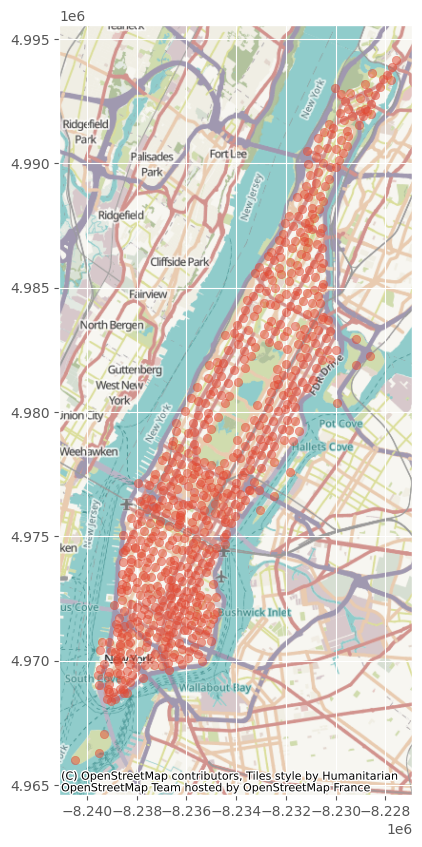

In [16]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
gdf.loc[gdf['Manhattan']].to_crs(3857).plot(ax=ax, alpha=0.5)
cx.add_basemap(ax)

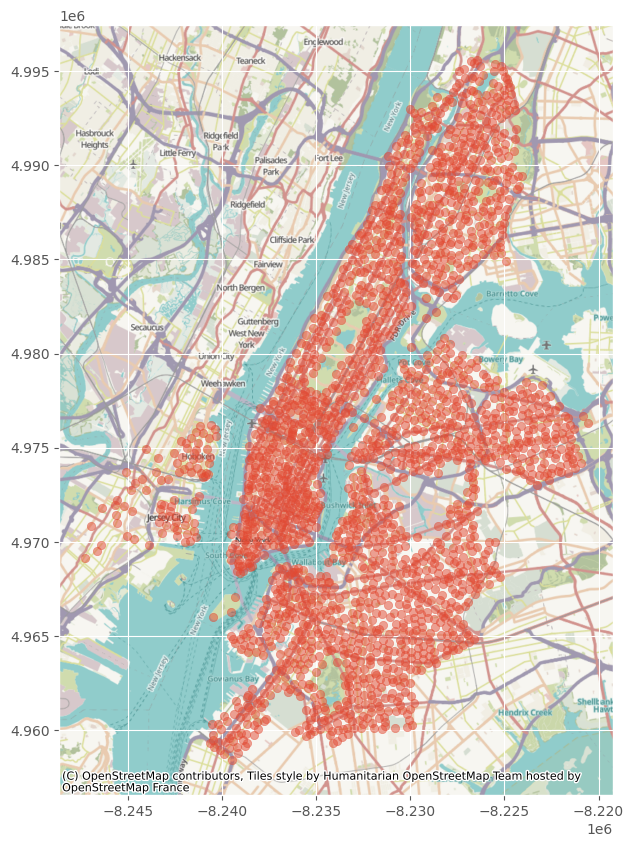

In [17]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
# nybb.plot(column='BoroCode', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
#pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat', ax=ax)

dd = pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']]

gdf.to_crs(3857).plot(ax=ax, alpha=0.5)
cx.add_basemap(ax)

In [18]:
ngbhoods = gpd.read_file("../data/CHS_2009_DOHMH_2010B/CHS_2009_DOHMH_2010B.shp")[["geometry", "FIRST_UHF_", "UHF_CODE"]]

In [19]:
ngbhoods

geometry  \
0   POLYGON ((1017992.893 269222.964, 1017812 2684...   
1   POLYGON ((1025012.99 270794.26, 1025061.481 27...   
2   POLYGON ((1023994.479 261065.967, 1023885.806 ...   
3   MULTIPOLYGON (((1035076.59 252950.826, 1035189...   
4   POLYGON ((1005218.261 199987.158, 1005308 1994...   
5   POLYGON ((992506.97 196757.604, 992517.69 1961...   
6   POLYGON ((999487 190339.999, 999528 190073, 99...   
7   POLYGON ((1021274 188677, 1021333 188209, 1021...   
8   MULTIPOLYGON (((985017.816 183086.038, 985117 ...   
9   POLYGON ((991522 178419, 991588 178146, 991668...   
10  POLYGON ((994544 181118, 994673 180873, 994809...   
11  MULTIPOLYGON (((1012386 178229, 1012552 177490...   
12  POLYGON ((979546 169008, 979451 168454, 979611...   
13  POLYGON ((1001091 161590, 1001593 160995.999, ...   
14  POLYGON ((1004673 199429, 1005172 199403, 1005...   
15  MULTIPOLYGON (((1005668.37 259009.582, 1005857...   
16  POLYGON ((1002429.34 239601.332, 1002493.759 2...   
17  MULTIPOLYGON (((1001767 233741, 1002215 233492...   
18  POLYGON ((993981 233184, 994768 232748, 994895...   
19  POLYGON ((1010873.509 223071.243, 1010985.119 ...   
20  MULTIPOLYGON (((1015258.112 219212.632, 101534...   
21  MULTIPOLYGON (((1034126.629 231113.423, 103600...   
22  POLYGON ((1027433 206826, 1027492 206683, 1027...   
23  MULTIPOLYGON (((1032557 199880.999, 1032864 19...   
24  MULTIPOLYGON (((1053775 195472, 1053859 195231...   
25  POLYGON ((1063633.546 216153.525, 1063672.125 ...   
26  MULTIPOLYGON (((1048934.908 163138.505, 104943...   
27  MULTIPOLYGON (((994255.79 213287.313, 993346.9...   
28  POLYGON ((986095 220802, 986839.434 220423.727...   
29  MULTIPOLYGON (((987086 208579, 987654.561 2082...   
30  POLYGON ((1057651.613 221022.142, 1057929.946 ...   
31  POLYGON ((962625.461 175742.864, 963085.551 17...   
32  MULTIPOLYGON (((934685 166908, 934697.476 1668...   
33  POLYGON ((1007916.255 252530.752, 1008237.865 ...   
34  MULTIPOLYGON (((1033048.157 181084.379, 103304...   

                              FIRST_UHF_     UHF_CODE  
0                Kingsbridge - Riverdale        101.0  
1                        Northeast Bronx        102.0  
2                   Fordham - Bronx Park        103.0  
3                   Pelham - Throgs Neck        104.0  
4                             Greenpoint        201.0  
5            Downtown  - Heights - Slope        202.0  
6     Bedford Stuyvesant - Crown Heights        203.0  
7                          East New York        204.0  
8                            Sunset Park        205.0  
9                           Borough Park        206.0  
10              East Flatbush - Flatbush        207.0  
11                  Canarsie - Flatlands        208.0  
12               Bensonhurst - Bay Ridge        209.0  
13         Coney Island - Sheepshead Bay        210.0  
14               Williamsburg - Bushwick        211.0  
15           Washington Heights - Inwood        301.0  
16  Central Harlem - Morningside Heights        302.0  
17                           East Harlem        303.0  
18                       Upper West Side        304.0  
19            Long Island City - Astoria        401.0  
20                           West Queens        402.0  
21                  Flushing - Clearview        403.0  
22              Ridgewood - Forest Hills        405.0  
23                      Southwest Queens        407.0  
24                               Jamaica        408.0  
25                      Southeast Queens        409.0  
26                              Rockaway        410.0  
27            Upper East Side - Gramercy     305307.0  
28                     Chelsea - Village     306308.0  
29         Union Square, Lower Manhattan     309310.0  
30                     Bayside - Meadows     404406.0  
31                           Northern SI     501502.0  
32                           Southern SI     503504.0  
33                           South Bronx  105106107.0  
34                              

<Axes: >

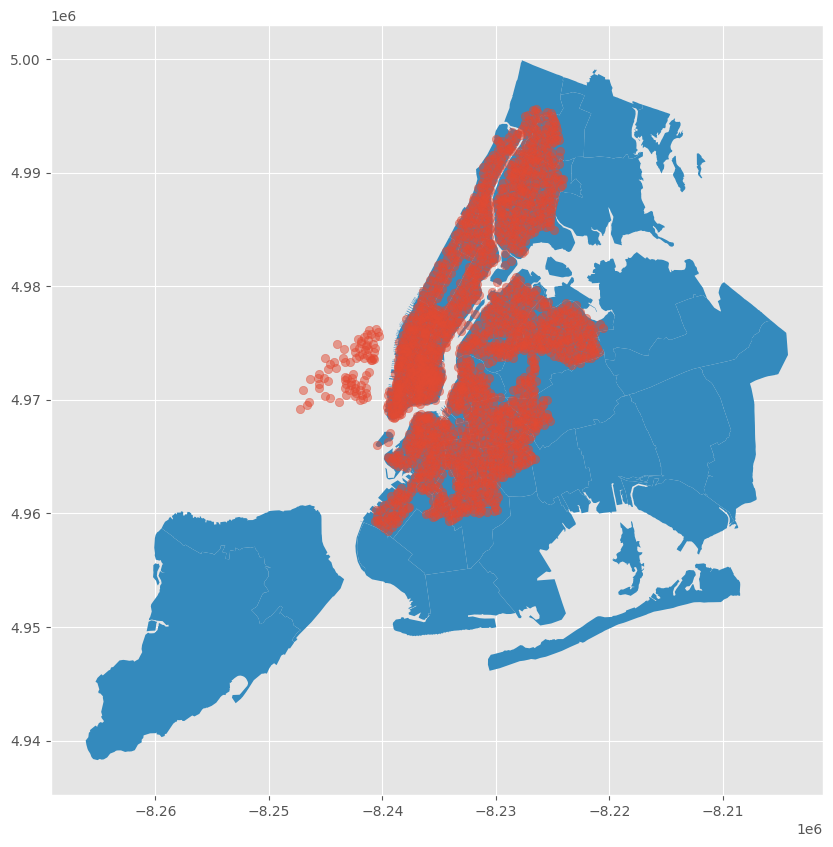

In [20]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ngbhoods.to_crs(3857).plot(ax=ax)
gdf.to_crs(3857).plot(ax=ax, alpha=0.5)

In [21]:
ngbhoods = gpd.read_file("../data/jersey_city_neighborhoods/Neighborhoods.shp")

In [22]:
ngbhoods

Id                  area                                           geometry
0   0              Downtown  POLYGON ((622384.941 683694.838, 615783.642 68...
1   0           The Heights  POLYGON ((616434.791 691463.714, 614907.96 693...
2   0             West Side  POLYGON ((612236.005 694539.83, 611786.937 693...
3   0        Journal Square  POLYGON ((616434.791 691463.714, 615940.816 68...
4   0      Bergen-Lafayette  POLYGON ((610984.666 689874.738, 611831.844 68...
5   0            Greenville  POLYGON ((602670.857 686748.5, 607677.965 6850...
6   0           Meadowlands  POLYGON ((607835.139 694831.724, 609098.805 69...
7   0    Liberty State Park  POLYGON ((622384.941 683694.838, 622256.817 68...
8   0  Port Industrial Area  POLYGON ((615732.789 676466.007, 612983.901 66...

<Axes: >

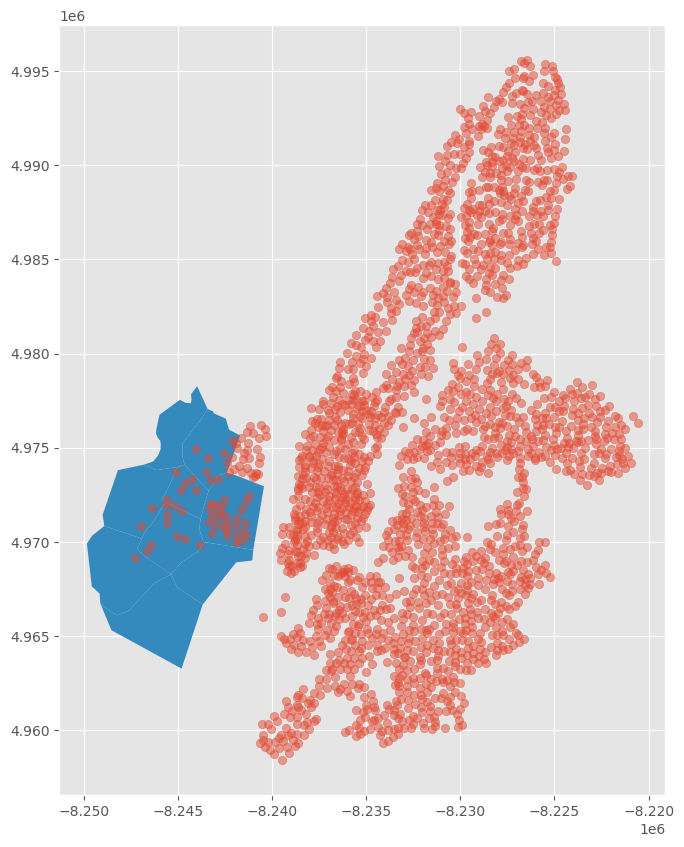

In [23]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ngbhoods.to_crs(3857).plot(ax=ax)
gdf.to_crs(3857).plot(ax=ax, alpha=0.5)

## Going through the rides data

In [24]:
df = pd.read_csv('../data/202405-citibike-tripdata/202405-citibike-tripdata_1.csv')

/var/folders/st/m0b_93g97bxcmqnsx5v2qdm00000gn/T/ipykernel_13329/4292729557.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/202405-citibike-tripdata/202405-citibike-tripdata_1.csv')


In [25]:
df

ride_id  rideable_type           started_at  \
0       FE6A074FC945A086  electric_bike  2024-05-01 08:05:53   
1       6844CF42F72827D7   classic_bike  2024-05-10 15:00:06   
2       D7C9E007F791A7A2   classic_bike  2024-05-06 12:28:39   
3       3419650E2F5999F1   classic_bike  2024-05-16 16:09:14   
4       5469FDC75E0F1FCA  electric_bike  2024-05-29 15:43:37   
...                  ...            ...                  ...   
999995  262489FCDAEA9A4D  electric_bike  2024-05-12 18:44:44   
999996  DA2615F1E0B456CA  electric_bike  2024-05-11 07:45:19   
999997  69B45F1E5EFDA6CE  electric_bike  2024-05-04 11:21:56   
999998  CD2C41A9E343EA25  electric_bike  2024-05-01 18:07:57   
999999  6B19869EA948F4C3  electric_bike  2024-05-16 12:24:02   

                   ended_at          start_station_name start_station_id  \
0       2024-05-01 08:15:14             1 Ave & E 30 St          6079.03   
1       2024-05-10 15:08:58              31 Ave & 57 St          6621.06   
2       2024-05-06 12:35:21             E 89 St & 3 Ave          7265.10   
3       2024-05-16 16:14:20             E 89 St & 3 Ave          7265.10   
4       2024-05-29 15:49:27             1 Ave & E 30 St          6079.03   
...                     ...                         ...              ...   
999995  2024-05-12 19:04:40         King St & Varick St          5687.11   
999996  2024-05-11 07:53:22             E 33 St & 1 Ave          6197.08   
999997  2024-05-04 12:05:07         Broadway & W 238 St          8879.03   
999998  2024-05-01 18:14:16             E 33 St & 1 Ave          6197.08   
999999  2024-05-16 12:27:26  Featherbed Ln & Nelson Ave          8327.15   

                  end_station_name end_station_id  start_lat  start_lng  \
0                  E 74 St & 1 Ave        6953.08  40.741509 -73.975355   
1             31 Ave & Steinway St        6782.01  40.757357 -73.904726   
2                  E 80 St & 2 Ave        7121.02  40.780628 -73.952167   
3                  E 80 St & 2 Ave        7121.02  40.780628 -73.952167   
4                  E 45 St & 3 Ave        6464.08  40.741444 -73.975361   
...                            ...            ...        ...        ...   
999995      Riverside Dr & W 72 St        7288.04  40.727623 -74.005058   
999996       E 43 St & Madison Ave        6551.11  40.743510 -73.974343   
999997      Riverside Dr & W 72 St        7288.04  40.885382 -73.900616   
999998       E 43 St & Madison Ave        6551.11  40.743286 -73.974544   
999999  Featherbed Ln & Jerome Ave        8285.11  40.846042 -73.919390   

          end_lat    end_lng member_casual  
0       40.768974 -73.954823        member  
1       40.761149 -73.917007        member  
2       40.773914 -73.954395        member  
3       40.773914 -73.954395        member  
4       40.752554 -73.972826        member  
...           ...        ...           ...  
999995  40.780578 -73.985624        casual  
999996  40.753547 -73.978966        casual  
999997  40.780578 -73.985624        member  
999998  40.753547 -73.978966        member  
999999  40.845505 -73.914311        member  

[1000000 rows x 13 columns]

In [26]:
df['started_at'].max()

'2024-05-31 23:59:59'

In [27]:
# the start station can be nan when the bike is taken from the street and not from a station

In [36]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['start_lng'], df['start_lat']), crs='EPSG:4326').to_crs(3857)

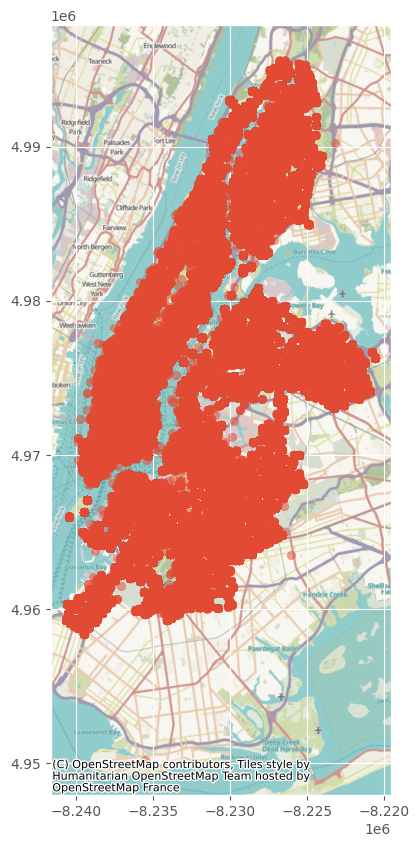

In [42]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
gdf.to_crs(3857).plot(ax=ax, alpha=0.5)
cx.add_basemap(ax)

In [37]:
ngbhoods = gpd.read_file("../data/CHS_2009_DOHMH_2010B/CHS_2009_DOHMH_2010B.shp")[["geometry", "FIRST_UHF_", "UHF_CODE"]]
ngbhoods

geometry  \
0   POLYGON ((1017992.893 269222.964, 1017812 2684...   
1   POLYGON ((1025012.99 270794.26, 1025061.481 27...   
2   POLYGON ((1023994.479 261065.967, 1023885.806 ...   
3   MULTIPOLYGON (((1035076.59 252950.826, 1035189...   
4   POLYGON ((1005218.261 199987.158, 1005308 1994...   
5   POLYGON ((992506.97 196757.604, 992517.69 1961...   
6   POLYGON ((999487 190339.999, 999528 190073, 99...   
7   POLYGON ((1021274 188677, 1021333 188209, 1021...   
8   MULTIPOLYGON (((985017.816 183086.038, 985117 ...   
9   POLYGON ((991522 178419, 991588 178146, 991668...   
10  POLYGON ((994544 181118, 994673 180873, 994809...   
11  MULTIPOLYGON (((1012386 178229, 1012552 177490...   
12  POLYGON ((979546 169008, 979451 168454, 979611...   
13  POLYGON ((1001091 161590, 1001593 160995.999, ...   
14  POLYGON ((1004673 199429, 1005172 199403, 1005...   
15  MULTIPOLYGON (((1005668.37 259009.582, 1005857...   
16  POLYGON ((1002429.34 239601.332, 1002493.759 2...   
17  MULTIPOLYGON (((1001767 233741, 1002215 233492...   
18  POLYGON ((993981 233184, 994768 232748, 994895...   
19  POLYGON ((1010873.509 223071.243, 1010985.119 ...   
20  MULTIPOLYGON (((1015258.112 219212.632, 101534...   
21  MULTIPOLYGON (((1034126.629 231113.423, 103600...   
22  POLYGON ((1027433 206826, 1027492 206683, 1027...   
23  MULTIPOLYGON (((1032557 199880.999, 1032864 19...   
24  MULTIPOLYGON (((1053775 195472, 1053859 195231...   
25  POLYGON ((1063633.546 216153.525, 1063672.125 ...   
26  MULTIPOLYGON (((1048934.908 163138.505, 104943...   
27  MULTIPOLYGON (((994255.79 213287.313, 993346.9...   
28  POLYGON ((986095 220802, 986839.434 220423.727...   
29  MULTIPOLYGON (((987086 208579, 987654.561 2082...   
30  POLYGON ((1057651.613 221022.142, 1057929.946 ...   
31  POLYGON ((962625.461 175742.864, 963085.551 17...   
32  MULTIPOLYGON (((934685 166908, 934697.476 1668...   
33  POLYGON ((1007916.255 252530.752, 1008237.865 ...   
34  MULTIPOLYGON (((1033048.157 181084.379, 103304...   

                              FIRST_UHF_     UHF_CODE  
0                Kingsbridge - Riverdale        101.0  
1                        Northeast Bronx        102.0  
2                   Fordham - Bronx Park        103.0  
3                   Pelham - Throgs Neck        104.0  
4                             Greenpoint        201.0  
5            Downtown  - Heights - Slope        202.0  
6     Bedford Stuyvesant - Crown Heights        203.0  
7                          East New York        204.0  
8                            Sunset Park        205.0  
9                           Borough Park        206.0  
10              East Flatbush - Flatbush        207.0  
11                  Canarsie - Flatlands        208.0  
12               Bensonhurst - Bay Ridge        209.0  
13         Coney Island - Sheepshead Bay        210.0  
14               Williamsburg - Bushwick        211.0  
15           Washington Heights - Inwood        301.0  
16  Central Harlem - Morningside Heights        302.0  
17                           East Harlem        303.0  
18                       Upper West Side        304.0  
19            Long Island City - Astoria        401.0  
20                           West Queens        402.0  
21                  Flushing - Clearview        403.0  
22              Ridgewood - Forest Hills        405.0  
23                      Southwest Queens        407.0  
24                               Jamaica        408.0  
25                      Southeast Queens        409.0  
26                              Rockaway        410.0  
27            Upper East Side - Gramercy     305307.0  
28                     Chelsea - Village     306308.0  
29         Union Square, Lower Manhattan     309310.0  
30                     Bayside - Meadows     404406.0  
31                           Northern SI     501502.0  
32                           Southern SI     503504.0  
33                           South Bronx  105106107.0  
34                              

In [45]:
ngbhoods = ngbhoods.to_crs(3857)

for idx, row in ngbhoods.iterrows():
    gdf[row['FIRST_UHF_']] = row['geometry'].contains(gdf['geometry'])

In [63]:
gdf.iloc[:, 14:]

Kingsbridge - Riverdale  Northeast Bronx  Fordham - Bronx Park  \
0                         False            False                 False   
1                         False            False                 False   
2                         False            False                 False   
3                         False            False                 False   
4                         False            False                 False   
...                         ...              ...                   ...   
999995                    False            False                 False   
999996                    False            False                 False   
999997                     True            False                 False   
999998                    False            False                 False   
999999                    False            False                 False   

        Pelham - Throgs Neck  Greenpoint  Downtown  - Heights - Slope  \
0                      False       False                        False   
1                      False       False                        False   
2                      False       False                        False   
3                      False       False                        False   
4                      False       False                        False   
...                      ...         ...                          ...   
999995                 False       False                        False   
999996                 False       False                        False   
999997                 False       False                        False   
999998                 False       False                        False   
999999                 False       False                        False   

        Bedford Stuyvesant - Crown Heights  East New York  Sunset Park  \
0                                    False          False        False   
1                                    False          False        False   
2                                    False          False        False   
3                                    False          False        False   
4                                    False          False        False   
...                                    ...            ...          ...   
999995                               False          False        False   
999996                               False          False        False   
999997                               False          False        False   
999998                               False          False        False   
999999                               False          False        False   

        Borough Park  ...  Southeast Queens  Rockaway  \
0              False  ...             False     False   
1              False  ...             False     False   
2              False  ...             False     False   
3              False  ...             False     False   
4              False  ...             False     False   
...              ...  ...               ...       ...   
999995         False  ...             False     False   
999996         False  ...             False     False   
999997         False  ...             False     False   
999998         False  ...             False     False   
999999         False  ...             False     False   

        Upper East Side - Gramercy  Chelsea - Village  \
0                             True              False   
1                            False              False   
2                             True              False   
3                             True              False   
4                             True              False   
...                            ...                ...   
999995                       False               True   
999996                        True              False   
999997                       False              False   
999998                        True              False   
999999                       False       

In [61]:
x = gdf.iloc[:, 14:].stack(dropna=False)

/var/folders/st/m0b_93g97bxcmqnsx5v2qdm00000gn/T/ipykernel_13329/3248943686.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  x = gdf.iloc[:, 14:].stack(dropna=False)


In [62]:
pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))

0         Upper East Side - Gramercy
1                        West Queens
2         Upper East Side - Gramercy
3         Upper East Side - Gramercy
4         Upper East Side - Gramercy
                     ...            
999734             Chelsea - Village
999735    Upper East Side - Gramercy
999736       Kingsbridge - Riverdale
999737    Upper East Side - Gramercy
999738                   South Bronx
Length: 999739, dtype: category
Categories (24, object): ['Bedford Stuyvesant - Crown Heights', 'Borough Park', 'Central Harlem - Morningside Heights', 'Chelsea - Village', ..., 'Upper West Side', 'Washington Heights - Inwood', 'West Queens', 'Williamsburg - Bushwick']

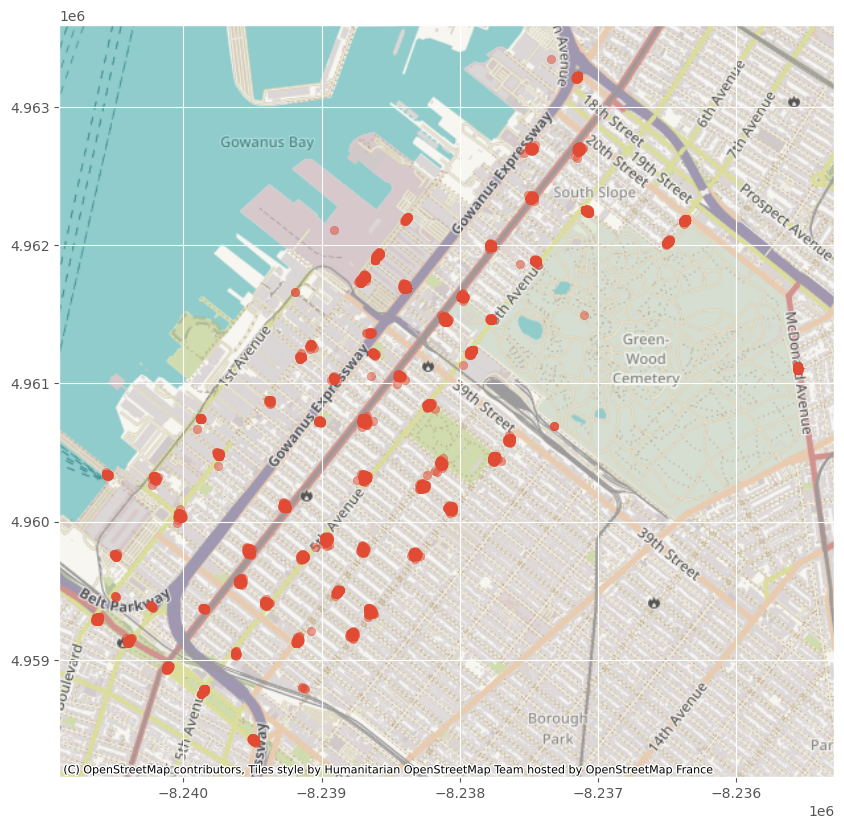

In [56]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
gdf.loc[gdf['Sunset Park']].plot(ax=ax, alpha=0.5)
cx.add_basemap(ax)